# 1. Import and Install Dependencies

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [7]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [10]:
cap = cv2.VideoCapture("DAYS.mp4")
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

In [11]:
len(results.left_hand_landmarks.landmark)

21

In [12]:
results

mediapipe.python.solution_base.SolutionOutputs

In [13]:
draw_landmarks(frame, results)

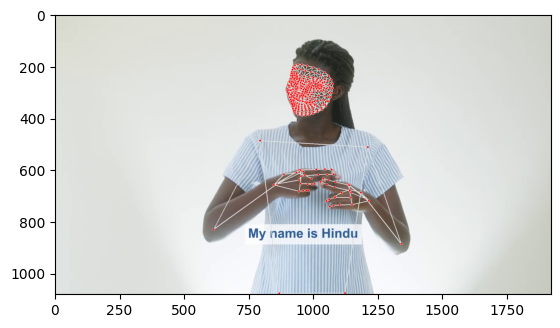

In [14]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [15]:
len(results.left_hand_landmarks.landmark)

21

In [16]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [17]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [18]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [19]:
result_test = extract_keypoints(results)

In [20]:
result_test

array([ 0.49069056,  0.28161946, -0.76488018, ...,  0.49900427,
        0.63058239,  0.00475784])

In [21]:
468*3+33*4+21*3+21*3

1662

In [23]:
np.save('0', result_test)

In [25]:
np.load('0.npy')

array([ 0.49069056,  0.28161946, -0.76488018, ...,  0.49900427,
        0.63058239,  0.00475784])

# 4. Setup Folders for Collection

In [26]:
from moviepy.editor import VideoFileClip

In [27]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_DATA')

# Scan the data folder to collect unique action labels
actions = set()
video_lengths = {}  # Dictionary to store video lengths

for filename in os.listdir(DATA_PATH):
    if filename.endswith('.mp4'):
        action = filename.split('.')[0]  # Extract the action label from the filename
        actions.add(action)

        # Get the duration of the video in frames
        video_path = os.path.join(DATA_PATH, filename)
        clip = VideoFileClip(video_path)
        duration = int(clip.duration * clip.fps)  # Duration in frames
        video_lengths[action] = duration
        clip.close()

# Convert the set of unique action labels to a NumPy array
actions = np.array(list(actions))

# Calculate the maximum sequence length (maximum frames)
MAX_SEQUENCE_LENGTH = max(video_lengths.values())


# number of sequences to extract
no_sequences = 1

print("Actions Detected:")
print(actions)

print("\nVideo Lengths (in frames):")
for action, length in video_lengths.items():
    print(f"{action}: {length} frames")

Actions Detected:
['as follows' 'ugandan' 'sign language' 'users' 'parents' 'other' 'start'
 'regions' 'but' 'family' 'topic' 'follows' 'hello' 'now' 'is' 'members'
 'guardians' 'have' 'numbers' 'here' 'diferrent' 'our' 'children' 'ways'
 'and']

Video Lengths (in frames):
and: 13 frames
as follows: 49 frames
but: 11 frames
children: 49 frames
diferrent: 43 frames
family: 19 frames
follows: 32 frames
guardians: 50 frames
have: 23 frames
hello: 13 frames
here: 16 frames
is: 16 frames
members: 41 frames
now: 42 frames
numbers: 43 frames
other: 17 frames
our: 19 frames
parents: 48 frames
regions: 32 frames
sign language: 32 frames
start: 25 frames
topic: 41 frames
ugandan: 53 frames
users: 34 frames
ways: 24 frames


In [28]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [29]:
from moviepy.editor import VideoFileClip

In [30]:

# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_DATA')


# Path to the folder containing video files
video_folder = 'MP_DATA'

# Get a list of all video file paths
video_paths = [os.path.join(video_folder, f) for f in os.listdir(video_folder) if f.endswith('.mp4')]

# Set mediapipe model
mp_holistic = mp.solutions.holistic

for video_path in video_paths:
    # Get the action label from the video file name
    action = os.path.basename(video_path).split('.')[0]

    # Initialize the video capture object
    cap = cv2.VideoCapture(video_path)

    # Check if the video capture was successful
    if not cap.isOpened():
        print(f"Error: Failed to open the video file {video_path}")
        continue

    # Get the video length (in frames) from the video_lengths dictionary
    sequence_length = video_lengths[action]

    # Set mediapipe model
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        # Create folder for action if it doesn't exist
        action_folder = os.path.join(DATA_PATH, action)
        if not os.path.exists(action_folder):
            os.makedirs(action_folder)

        # Get the next available sequence folder name
        sequence_id = 0
        sequence_folder = os.path.join(action_folder, str(sequence_id))
        while os.path.exists(sequence_folder):
            sequence_id += 1
            sequence_folder = os.path.join(action_folder, str(sequence_id))

        # Create the new sequence folder
        os.makedirs(sequence_folder)

        # Check if all NumPy files already exist in the sequence folder
        existing_files = [f for f in os.listdir(sequence_folder) if f.endswith('.npy')]
        if len(existing_files) == sequence_length:
            print(f"Extraction already done for {action}. Skipping...")
            continue

        # Loop through video length aka sequence length
        for frame_num in range(sequence_length):
            # Read feed
            ret, frame = cap.read()

            # Check if the frame is empty
            if not ret:
                print(f"Error: Failed to read frame from the video capture {video_path}")
                break

            # Make detections
            image, results = mediapipe_detection(frame, holistic)

            # Draw landmarks
            draw_styled_landmarks(image, results)

            # Apply wait logic
            if frame_num == 0:
                cv2.putText(image, 'STARTING COLLECTION', (120, 200),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence_id), (15, 12),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

                # Show to screen
                cv2.imshow('OpenCV Feed', image)
                cv2.waitKey(500)

            else:
                cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence_id), (15, 12),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

                # Show to screen
                cv2.imshow('OpenCV Feed', image)

                # Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(sequence_folder, str(frame_num))
                np.save(npy_path, keypoints)

            # Break gracefully
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

    # Release video capture
    cap.release()

# Close OpenCV windows
cv2.destroyAllWindows()    

Error: Failed to read frame from the video capture MP_DATA\follows.mp4
Error: Failed to read frame from the video capture MP_DATA\have.mp4
Error: Failed to read frame from the video capture MP_DATA\here.mp4
Error: Failed to read frame from the video capture MP_DATA\is.mp4
Error: Failed to read frame from the video capture MP_DATA\parents.mp4
Error: Failed to read frame from the video capture MP_DATA\regions.mp4
Error: Failed to read frame from the video capture MP_DATA\sign language.mp4
Error: Failed to read frame from the video capture MP_DATA\start.mp4


In [31]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [32]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [33]:
label_map = {label:num for num, label in enumerate(actions)}

In [34]:
label_map

{'as follows': 0,
 'ugandan': 1,
 'sign language': 2,
 'users': 3,
 'parents': 4,
 'other': 5,
 'start': 6,
 'regions': 7,
 'but': 8,
 'family': 9,
 'topic': 10,
 'follows': 11,
 'hello': 12,
 'now': 13,
 'is': 14,
 'members': 15,
 'guardians': 16,
 'have': 17,
 'numbers': 18,
 'here': 19,
 'diferrent': 20,
 'our': 21,
 'children': 22,
 'ways': 23,
 'and': 24}

In [35]:
import os
import numpy as np

# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_DATA')

# Actions (labels) in the dataset
potential_actions = os.listdir(DATA_PATH)
actions = [action for action in potential_actions if os.path.isdir(os.path.join(DATA_PATH, action))]

# Dictionary to map action names to label indices
label_map = {action: idx for idx, action in enumerate(actions)}

sequences, labels = [], []

for action in actions:
    action_folder = os.path.join(DATA_PATH, action)
    sequence_folders = [os.path.join(action_folder, f) for f in os.listdir(action_folder) if os.path.isdir(os.path.join(action_folder, f))]
    sequence_folders = sorted(sequence_folders)

    for sequence_folder in sequence_folders:
        sequence = []
        frame_files = sorted([f for f in os.listdir(sequence_folder) if f.endswith('.npy') and not f.startswith('._')])
        sequence_length = len(frame_files)

        for frame_num in range(sequence_length):
            npy_path = os.path.join(sequence_folder, frame_files[frame_num])
            try:
                res = np.load(npy_path)
                sequence.append(res)
            except EOFError:
                print(f"Warning: Skipping empty or corrupted file: {npy_path}")
                continue

        sequences.append(sequence)
        labels.append(label_map[action])

In [36]:
import numpy as np
from keras.preprocessing.sequence import pad_sequences

# Get the length of the longest sequence
max_sequence_length = max(len(seq) for seq in sequences)

# Pad the sequences
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Convert the padded sequences to a NumPy array
sequences_array = np.array(padded_sequences)

In [37]:
np.array(labels).shape

(375,)

In [38]:
import numpy as np
from keras.preprocessing.sequence import pad_sequences

# Get the length of the longest sequence
max_sequence_length = max(len(seq) for seq in sequences)

# Pad the sequences
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Convert the padded sequences to a NumPy array
X = np.array(padded_sequences)

In [39]:
X.shape

(375, 52, 1662)

In [40]:
y = to_categorical(labels).astype(int)

In [41]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [43]:
y_test.shape

(19, 25)

# 7. Build and Train LSTM Neural Network

In [44]:

from tensorflow.keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, RepeatVector

In [45]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [48]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking
from keras.layers import Conv1D, MaxPooling1D

model = Sequential()

# Masking layer to handle variable sequence lengths
model.add(Masking(mask_value=0.0, input_shape=(None, 1662)))

# 1D CNN layers
model.add(Conv1D(64, 3, activation='relu', padding='same'))
model.add(MaxPooling1D(2))
model.add(Conv1D(128, 3, activation='relu', padding='same'))
model.add(MaxPooling1D(2))

# LSTM layers
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(256, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False, activation='relu'))

# Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))

# Output layer with the number of classes
model.add(Dense(len(actions), activation='softmax'))


In [49]:
res = [.7, 0.2, 0.1]

In [50]:
actions[np.argmax(res)]

'and'

In [51]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [52]:
model.fit(X_train, y_train, epochs=100, callbacks=[tb_callback])

Epoch 1/100


12/12 [==============================] - 9s 88ms/step - loss: 3.2168 - categorical_accuracy: 0.0421
Epoch 2/100
12/12 [==============================] - 1s 79ms/step - loss: 3.1689 - categorical_accuracy: 0.0421
Epoch 3/100
12/12 [==============================] - 1s 80ms/step - loss: 3.0995 - categorical_accuracy: 0.0309
Epoch 4/100
12/12 [==============================] - 1s 81ms/step - loss: 3.0161 - categorical_accuracy: 0.0702
Epoch 5/100
12/12 [==============================] - 1s 82ms/step - loss: 2.8910 - categorical_accuracy: 0.1292
Epoch 6/100
12/12 [==============================] - 1s 79ms/step - loss: 2.6660 - categorical_accuracy: 0.1573
Epoch 7/100
12/12 [==============================] - 1s 79ms/step - loss: 2.3941 - categorical_accuracy: 0.1882
Epoch 8/100
12/12 [==============================] - 1s 78ms/step - loss: 2.1842 - categorical_accuracy: 0.2472
Epoch 9/100
12/12 [==============================] - 1s 79ms/step - loss: 2.1164 - categorical_accurac

In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_2 (Masking)         (None, None, 1662)        0         
                                                                 
 conv1d (Conv1D)             (None, None, 64)          319168    
                                                                 
 max_pooling1d (MaxPooling1  (None, None, 64)          0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, None, 128)         24704     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, None, 128)         0         
 g1D)                                                            
                                                                 
 lstm (LSTM)                 (None, None, 128)        

# 8. Make Predictions

In [55]:
res = model.predict(X_test)

1/1 [==============================] - 1s 890ms/step


In [56]:
actions[np.argmax(res[8])]

'have'

In [57]:
actions[np.argmax(y_test[8])]

'have'

# 9. Save Weights

In [66]:
model.save('ugsign.h5')

In [217]:
del model

In [67]:
model.load_weights('ugsign.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [58]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [59]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 65ms/step


In [60]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [61]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[16,  0],
        [ 0,  3]],

       [[17,  1],
        [ 0,  1]],

       [[18,  0],
        [ 0,  1]],

       [[18,  0],
        [ 0,  1]],

       [[16,  0],
        [ 0,  3]],

       [[18,  0],
        [ 0,  1]],

       [[18,  0],
        [ 0,  1]],

       [[18,  0],
        [ 0,  1]],

       [[18,  0],
        [ 1,  0]],

       [[18,  0],
        [ 0,  1]],

       [[18,  0],
        [ 0,  1]],

       [[17,  0],
        [ 0,  2]],

       [[17,  0],
        [ 0,  2]]], dtype=int64)

In [62]:
accuracy_score(ytrue, yhat)

0.9473684210526315

# 11. Test in Real Time

In [63]:
import pyttsx3

In [74]:

# Initialize the text-to-speech engine
audio = pyttsx3.init()

# 1. New detection variables
sequence = []
sentence = []
threshold = 0.4
cap = cv2.VideoCapture("test.mp4")

# Set mediapipe model
mp_holistic = mp.solutions.holistic
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)  # Print the results

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.insert(0, keypoints)
        sequence = sequence[-30:]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predicted_action = actions[np.argmax(res)]
            print(predicted_action)  # Print the predicted action
            audio.say(predicted_action)  # Speak the predicted action
            audio.runAndWait()

        # 3. Viz logic
            if res[np.argmax(res)] > threshold:
                if len(sentence) > 0:
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                    sentence = sentence[-5:]

        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

In [64]:
import numpy as np
import cv2
import mediapipe as mp
import pyttsx3

# Initialize the text-to-speech engine
audio = pyttsx3.init()

# Initialize variables
sequence = []  # Initialize an empty sequence
sentence = []  # Initialize an empty sentence
threshold = 0.4
MIN_SEQUENCE_LENGTH_FOR_PREDICTION = 12  # Minimum sequence length required for prediction
MIN_THRESHOLD_PROBABILITY = 0.6  # Minimum probability required for prediction

cap = cv2.VideoCapture("test.mp4")

# Set mediapipe model
mp_holistic = mp.solutions.holistic

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()
        
        if not ret:
            print("Failed to capture frame from camera. Check camera connection.")
            break

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)  # Print the results
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)

        # Perform prediction when the sequence length is sufficient for a word
        if len(sequence) >= MIN_SEQUENCE_LENGTH_FOR_PREDICTION:
            # Convert sequence to numpy array
            sequence_array = np.expand_dims(sequence, axis=0)

            # Perform prediction
            res = model.predict(sequence_array)[0]

            # Get the predicted action
            max_prob_index = np.argmax(res)
            predicted_action = actions[max_prob_index]
            predicted_prob = res[max_prob_index]
            
            print(predicted_action, predicted_prob)  # Print the predicted action and probability
            
            # Check if prediction probability exceeds the threshold
            if predicted_prob >= MIN_THRESHOLD_PROBABILITY:
                # Speak the predicted action
                audio.say(predicted_action)
                audio.runAndWait()

                # Clear the sequence after prediction
                sequence = []

                # Update sentence
                if len(sentence) > 0:
                    if predicted_action != sentence[-1]:
                        sentence.append(predicted_action)
                else:
                    sentence.append(predicted_action)

                if len(sentence) > 5:
                    sentence = sentence[-5:]

        # Viz logic
        if len(sentence) > 0:
            cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
            cv2.putText(image, ' '.join(sentence), (3, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2,
                        cv2.LINE_AA)

        # Show the frame
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

# Release the video capture
cap.release()

# Close all OpenCV windows
cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 1s 724ms/step
but 0.056380346
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 1s 712ms/step
but 0.056380346
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 44ms/step
but 0.056378

KeyboardInterrupt: 

In [ ]:
cap.release()
cv2.destroyAllWindows()